# Data-Driven Approach to Ground-Truth Labels

In [7]:
import pandas as pd
import numpy as np
import networkx as nx
import pickle as pkl

import scipy as sp
import matplotlib.pyplot as plt
import math

from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score

## Clusters from Raw Export Values

In [19]:
with open('../csv_files/exports_graphs_raw.pkl', 'rb') as file:
    export_graphs = pkl.load(file)

In [20]:
silhouettes = []
for c in range(2,20):
    train_clusters = []

    for g in export_graphs:
        # Compute the normalized Laplacian matrix of the graph
        laplacian = nx.normalized_laplacian_matrix(g)

        # Perform spectral clustering
        clustering = SpectralClustering(n_clusters=c, assign_labels='discretize', random_state=0).fit(laplacian.toarray())

        train_clusters.append(clustering.labels_)

        silhouette = silhouette_score(laplacian.toarray(), clustering.labels_)

    silhouettes.append(np.mean(silhouette))

/Users/sinclaireschuetze/Documents/GitHub/Trade-GNN-ChangePoint/.env/lib/python3.11/site-packages/sklearn/cluster/_spectral.py:701: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
/Users/sinclaireschuetze/Documents/GitHub/Trade-GNN-ChangePoint/.env/lib/python3.11/site-packages/sklearn/cluster/_spectral.py:701: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
/Users/sinclaireschuetze/Documents/GitHub/Trade-GNN-ChangePoint/.env/lib/python3.11/site-packages/sklearn/cluster/_spectral.py:701: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
/Users/sinclaireschuetze/Documents/GitHub/Trad

In [21]:
silhouettes

[0.029893479924786408,
 0.03059406972286832,
 0.022640242411854018,
 0.009392711403698576,
 0.007347461653486806,
 0.003336267187780522,
 0.0038420533732567114,
 0.0019128050081075182,
 0.0008284569444311013,
 0.0008454460661005347,
 -0.0007227092229668342,
 -0.0009623863419050655,
 -0.0021520959040381353,
 -0.0008584781993727141,
 -0.0005320891766171542,
 -0.002255507041349534,
 -0.004231750817495436,
 -0.0041206549462288865]

In [22]:
train_clusters = []

for g in export_graphs:
    # Compute the normalized Laplacian matrix of the graph
    laplacian = nx.normalized_laplacian_matrix(g)

    # Perform spectral clustering
    clustering = SpectralClustering(n_clusters=3, assign_labels='discretize', random_state=0).fit(laplacian.toarray())

    train_clusters.append(clustering.labels_)

/Users/sinclaireschuetze/Documents/GitHub/Trade-GNN-ChangePoint/.env/lib/python3.11/site-packages/sklearn/cluster/_spectral.py:701: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
/Users/sinclaireschuetze/Documents/GitHub/Trade-GNN-ChangePoint/.env/lib/python3.11/site-packages/sklearn/cluster/_spectral.py:701: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
/Users/sinclaireschuetze/Documents/GitHub/Trade-GNN-ChangePoint/.env/lib/python3.11/site-packages/sklearn/cluster/_spectral.py:701: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
/Users/sinclaireschuetze/Documents/GitHub/Trad

In [23]:
ari_scores_train = []

# Compute the Adjusted Rand Index
for c_1 in train_clusters:
    current_ari_scores = []
    for c_2 in train_clusters:
        ari = adjusted_rand_score(c_1, c_2)
        current_ari_scores.append(ari)
    ari_scores_train.append(current_ari_scores)

In [24]:
silhouettes = []
for c in range(10,25):
    train_graph_clustering = SpectralClustering(n_clusters=c, assign_labels='discretize', random_state=0).fit(ari_scores_train)

    silhouette = silhouette_score(ari_scores_train, train_graph_clustering.labels_)
    silhouettes.append(silhouette)

/Users/sinclaireschuetze/Documents/GitHub/Trade-GNN-ChangePoint/.env/lib/python3.11/site-packages/sklearn/cluster/_spectral.py:701: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
/Users/sinclaireschuetze/Documents/GitHub/Trade-GNN-ChangePoint/.env/lib/python3.11/site-packages/sklearn/cluster/_spectral.py:701: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
/Users/sinclaireschuetze/Documents/GitHub/Trade-GNN-ChangePoint/.env/lib/python3.11/site-packages/sklearn/cluster/_spectral.py:701: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
/Users/sinclaireschuetze/Documents/GitHub/Trad

In [25]:
silhouettes

[0.337777471269799,
 0.323998166192785,
 0.3219085304427905,
 0.30469149901038245,
 0.317472730665656,
 0.320955633720141,
 0.31576642569468477,
 0.31770168820984307,
 0.31084540348323286,
 0.31714655232111405,
 0.3112015621030206,
 0.28757189174135955,
 0.2836720769625681,
 0.2907151822104061,
 0.2972869705145288]

In [26]:
train_graph_clustering = SpectralClustering(n_clusters=10, assign_labels='discretize', random_state=0).fit(ari_scores_train)

/Users/sinclaireschuetze/Documents/GitHub/Trade-GNN-ChangePoint/.env/lib/python3.11/site-packages/sklearn/cluster/_spectral.py:701: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(


In [27]:
labels = train_graph_clustering.labels_

In [32]:
centroids = []
for i in np.unique(labels):
    positions = []
    for t, j in enumerate(labels):
        if j == i:
            positions.append(t)
    mean_position = np.mean(positions)

    differences = np.abs(positions - mean_position)

    # Find the value in the array closest to the value
    closest_value = positions[np.argmin(differences)]

    centroids.append(closest_value)

In [34]:
change_point_years = []
for i in centroids:
    change_point_years.append(i + 1962)

## Percentage Export Values

In [3]:
with open('../graphs/exports_graphs.pkl', 'rb') as file:
    export_graphs = pkl.load(file)

In [6]:
silhouettes = []
for c in range(2,20):
    train_clusters = []

    for g in export_graphs:
        # Compute the normalized Laplacian matrix of the graph
        laplacian = nx.normalized_laplacian_matrix(g)

        # Perform spectral clustering
        clustering = SpectralClustering(n_clusters=c, assign_labels='discretize', random_state=0).fit(laplacian.toarray())

        train_clusters.append(clustering.labels_)

        silhouette = silhouette_score(laplacian.toarray(), clustering.labels_)

    silhouettes.append(np.mean(silhouette))

/Users/sinclaireschuetze/Documents/GitHub/Trade-GNN-ChangePoint/.env/lib/python3.11/site-packages/sklearn/cluster/_spectral.py:701: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
/Users/sinclaireschuetze/Documents/GitHub/Trade-GNN-ChangePoint/.env/lib/python3.11/site-packages/sklearn/cluster/_spectral.py:701: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
/Users/sinclaireschuetze/Documents/GitHub/Trade-GNN-ChangePoint/.env/lib/python3.11/site-packages/sklearn/cluster/_spectral.py:701: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
/Users/sinclaireschuetze/Documents/GitHub/Trad

In [8]:
train_clusters = []

for g in export_graphs:
    # Compute the normalized Laplacian matrix of the graph
    laplacian = nx.normalized_laplacian_matrix(g)

    # Perform spectral clustering
    clustering = SpectralClustering(n_clusters=2, assign_labels='discretize', random_state=0).fit(laplacian.toarray())

    train_clusters.append(clustering.labels_)

/Users/sinclaireschuetze/Documents/GitHub/Trade-GNN-ChangePoint/.env/lib/python3.11/site-packages/sklearn/cluster/_spectral.py:701: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
/Users/sinclaireschuetze/Documents/GitHub/Trade-GNN-ChangePoint/.env/lib/python3.11/site-packages/sklearn/cluster/_spectral.py:701: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
/Users/sinclaireschuetze/Documents/GitHub/Trade-GNN-ChangePoint/.env/lib/python3.11/site-packages/sklearn/cluster/_spectral.py:701: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
/Users/sinclaireschuetze/Documents/GitHub/Trad

In [9]:
ari_scores_train = []

# Compute the Adjusted Rand Index
for c_1 in train_clusters:
    current_ari_scores = []
    for c_2 in train_clusters:
        ari = adjusted_rand_score(c_1, c_2)
        current_ari_scores.append(ari)
    ari_scores_train.append(current_ari_scores)

In [10]:
silhouettes = []
for c in range(10,25):
    train_graph_clustering = SpectralClustering(n_clusters=c, assign_labels='discretize', random_state=0).fit(ari_scores_train)

    silhouette = silhouette_score(ari_scores_train, train_graph_clustering.labels_)
    silhouettes.append(silhouette)

/Users/sinclaireschuetze/Documents/GitHub/Trade-GNN-ChangePoint/.env/lib/python3.11/site-packages/sklearn/cluster/_spectral.py:701: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
/Users/sinclaireschuetze/Documents/GitHub/Trade-GNN-ChangePoint/.env/lib/python3.11/site-packages/sklearn/cluster/_spectral.py:701: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
/Users/sinclaireschuetze/Documents/GitHub/Trade-GNN-ChangePoint/.env/lib/python3.11/site-packages/sklearn/cluster/_spectral.py:701: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
/Users/sinclaireschuetze/Documents/GitHub/Trad

In [11]:
train_graph_clustering = SpectralClustering(n_clusters=14, assign_labels='discretize', random_state=0).fit(ari_scores_train)
labels = train_graph_clustering.labels_

/Users/sinclaireschuetze/Documents/GitHub/Trade-GNN-ChangePoint/.env/lib/python3.11/site-packages/sklearn/cluster/_spectral.py:701: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(


In [12]:
centroids = []
for i in np.unique(labels):
    positions = []
    for t, j in enumerate(labels):
        if j == i:
            positions.append(t)
    mean_position = np.mean(positions)

    differences = np.abs(positions - mean_position)

    # Find the value in the array closest to the value
    closest_value = positions[np.argmin(differences)]

    centroids.append(closest_value)


In [13]:
change_point_years = []
for i in centroids:
    change_point_years.append(i + 1962)

In [15]:
per_years = [1962,1963,1967,1978,1982,1983,1986,1989,1993,1996,2002,2008,2012,2016]

In [16]:
raw_years = [1967, 1973, 1981, 1989, 1990,  1996, 2002, 2007, 2012, 2016]

In [24]:
domain_years = [1962, 1968, 1973, 1979, 1989, 1990, 1991, 1992, 1994, 1995, 1997, 2000, 2001, 2003, 2005, 2007, 2009, 2010, 2014, 2015, 2016, 2018]

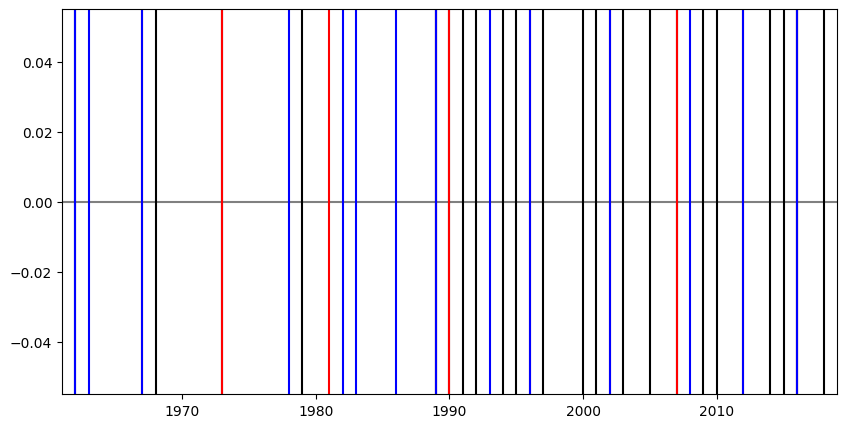

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Years for the x-axis
years = np.arange(1961, 2020)

# Create a new figure
plt.figure(figsize=(10, 5))

# Plot a straight line at y=0
plt.plot(years, [0]*len(years), color='grey')

# Add vertical lines
for year in domain_years:
    plt.axvline(x=year, color='black')
for year in raw_years:
    plt.axvline(x=year, color='red')
for year in per_years:
    plt.axvline(x=year, color='blue')

# Set the x-axis limits
plt.xlim(1961, 2019)

plt.show()

In [39]:
ground_truth = []
for i in range(1962, 2017, 3):
    year_1 = i
    year_2 = i + 1
    year_3 = i + 2

    year_1_num = 0
    year_2_num = 0 
    year_3_num = 0

    if year_1 in domain_years:
        year_1_num = 1
    if year_2 in domain_years:
        year_2_num = 1
    if year_3 in domain_years:
        year_3_num = 1
    
    if year_1 in raw_years:
        year_1_num += 1
    if year_2 in raw_years:
        year_2_num += 1
    if year_3 in raw_years:
        year_3_num += 1

    if year_1 in per_years:
        year_1_num += 1
    if year_2 in per_years:
        year_2_num += 1
    if year_3 in per_years:
        year_3_num += 1

    if year_1_num >= 2 and year_1 not in ground_truth:
        ground_truth.append(year_1)
    elif year_2_num >= 2 and year_2 not in ground_truth:
        ground_truth.append(year_2)
    elif year_3_num >= 2 and year_3 not in ground_truth:
        ground_truth.append(year_3)
    elif year_1_num == 1 and year_2_num == 1 and year_3_num == 1 and year_2 not in ground_truth:
        ground_truth.append(year_2)
    elif year_1_num == 1 and year_2_num == 1 and year_2 not in ground_truth:
        ground_truth.append(year_2)
    elif year_1_num == 1 and year_3_num == 1 and year_2 not in ground_truth:
        ground_truth.append(year_2)
    elif year_2_num == 1 and year_3_num == 1 and year_2 not in ground_truth:
        ground_truth.append(year_2)


In [43]:
ground_truth

[1962, 1967, 1973, 1978, 1981, 1989, 1993, 1996, 2002, 2007, 2012, 2014, 2016]